In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#Load the dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
#Here we see there are 50000 training images and 1000 test images
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

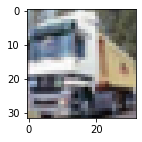

In [14]:
plt.figure(figsize= (15,2))
plt.imshow(X_train[1])

In [15]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [16]:
y_test = y_test.reshape(-1,)

In [17]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [18]:
#Let's plot some images to see what they are
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

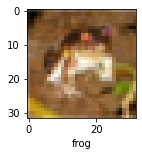

In [19]:
plot_sample(X_train, y_train, 0)

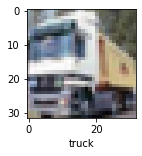

In [20]:
plot_sample(X_train, y_train, 1)

## Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [21]:
#Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.8114 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 147s 94ms/step - loss: 1.6262 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.5440 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4827 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4342 - accuracy: 0.4954


In [ ]:
# You can see that at the end of 5 epochs, accuracy is at around 49%

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.51      0.50      1000
           1       0.63      0.53      0.57      1000
           2       0.37      0.39      0.38      1000
           3       0.40      0.32      0.35      1000
           4       0.38      0.51      0.44      1000
           5       0.64      0.16      0.26      1000
           6       0.63      0.38      0.47      1000
           7       0.50      0.59      0.55      1000
           8       0.38      0.81      0.52      1000
           9       0.59      0.42      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [24]:
# Now let us build a convolutional neural network to train our images
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4330 - accuracy: 0.4840
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0827 - accuracy: 0.6201
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9450 - accuracy: 0.6708
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8561 - accuracy: 0.7042
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7904 - accuracy: 0.7252
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7318 - accuracy: 0.7451
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6832 - accuracy: 0.7611
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6351 - accuracy: 0.7767
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.5950 - accuracy: 0.7927
Epoch 10/10
1563/1563 [==============================] - 67s 43m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9452 - accuracy: 0.6962


[0.9451608657836914, 0.6962000131607056]

In [28]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[1.10693996e-04, 7.15571514e-06, 5.52055892e-04, 8.39367032e-01,
        3.69268993e-04, 6.51674867e-02, 2.63667293e-03, 9.73723857e-08,
        9.17879120e-02, 1.57734257e-06],
       [6.44032806e-02, 2.06884891e-02, 3.01697969e-06, 8.34772663e-07,
        7.63271828e-07, 9.14475518e-09, 3.09707565e-10, 1.02487085e-09,
        9.14507151e-01, 3.96358053e-04],
       [7.90283605e-02, 2.68352240e-01, 1.51903398e-04, 8.79463507e-04,
        5.85468602e-04, 8.89517687e-05, 3.48911308e-05, 8.00587732e-05,
        6.47909224e-01, 2.88944994e-03],
       [9.73278403e-01, 2.01179180e-02, 3.22342850e-04, 6.13227487e-04,
        6.27423811e-04, 4.34620318e-07, 8.23833659e-07, 1.43639900e-05,
        4.94130328e-03, 8.37262269e-05],
       [1.50121582e-09, 9.85565712e-05, 2.60566827e-03, 5.55826258e-03,
        1.38137385e-01, 3.60655249e-04, 8.53237987e-01, 5.07317708e-08,
        1.31103775e-06, 1.43641348e-08]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

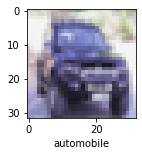

In [34]:
plot_sample(X_test, y_test,9)

In [35]:
classes[y_classes[9]]

'automobile'

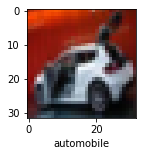

In [36]:
plot_sample(X_test, y_test,6)

In [37]:
classes[y_classes[6]]

'automobile'

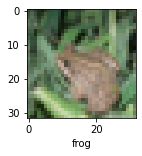

In [39]:
plot_sample(X_test, y_test,4)

In [40]:
classes[y_classes[4]]

'frog'